In [119]:
# 해당 소스를 이용하여 FCNN
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

In [120]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [121]:
data.columns
#7개

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [122]:
data['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [123]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [124]:
X = data.drop(['class'], axis=1)
y = data['class']

In [125]:
le = LabelEncoder()
y = le.fit_transform(y)

In [126]:
X['buying'] = le.fit_transform(X['buying'])

In [127]:
X['maint'] = le.fit_transform(X['maint'])

In [128]:
X['doors'] = le.fit_transform(X['doors'])

In [129]:
X['persons'] = le.fit_transform(X['persons'])

In [130]:
X['lug_boot'] = le.fit_transform(X['lug_boot'])

In [131]:
X['safety'] = le.fit_transform(X['safety'])

In [132]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1649,1,1,1,0,2,0
1465,1,0,2,0,0,2
361,3,1,1,1,2,2
315,3,2,3,2,2,1
1372,1,3,2,2,1,2


In [134]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [135]:

X.shape

(1728, 6)

In [136]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [137]:

X.shape

(1728, 6)

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [139]:
X.shape

(1728, 6)

In [140]:
X= np.expand_dims(input,axis=-1)
X.shape

(1,)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv1D(32,kernel_size=3,activation='relu',input_shape=(6,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 4, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,964 (35.02 KB)

 Trainable params: 8,964 (35.02 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [145]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 1.1070 - val_accuracy: 0.6936 - val_loss: 0.8012
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.7093 - loss: 0.7625 - val_accuracy: 0.6936 - val_loss: 0.7520
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7146 - loss: 0.7035 - val_accuracy: 0.6821 - val_loss: 0.7091
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.7236 - loss: 0.6689 - val_accuracy: 0.6936 - val_loss: 0.6755
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7210 - loss: 0.6681 - val_accuracy: 0.7197 - val_loss: 0.6512
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.7245 - loss: 0.6127 - val_accuracy: 0.7399 - val_loss: 0.6142
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7449 - loss: 0.5881 - val_accuracy: 0.7457 - val_loss: 0.5866
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7417 - loss: 0.5846 - val_accura

In [146]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

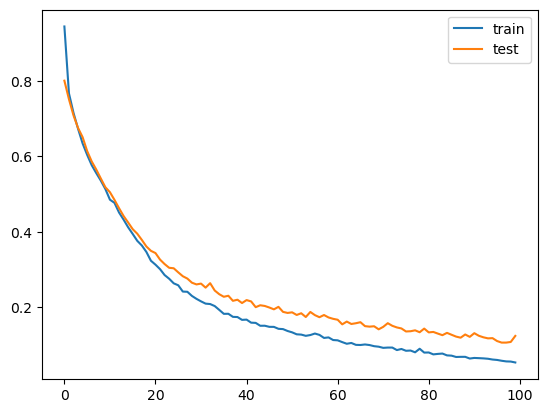

In [147]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

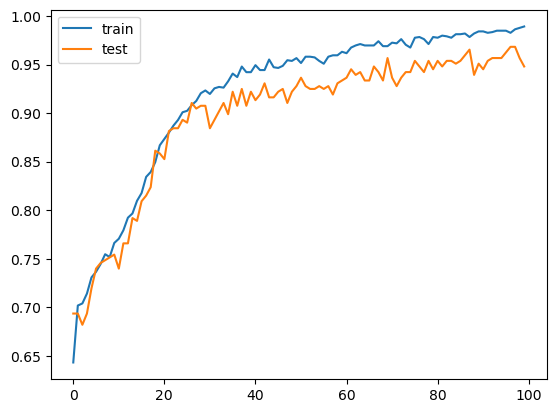

In [148]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend()

In [150]:
model.evaluate(X_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9408 - loss: 0.1460


[0.12325957417488098, 0.9479768872261047]

In [151]:
model.evaluate(X_train,y_train)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9890 - loss: 0.0523


[0.057297494262456894, 0.9840810298919678]

In [153]:
import tensorflow as tf

base_loss,base_accuracy=model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9408 - loss: 0.1460
